In [1]:
# misc
import warnings
warnings.filterwarnings('ignore')
import gc

# basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sns.set(palette='colorblind')

# processing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import gmean, mode
from scipy.sparse import csr_matrix

import shap

# models
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
# This will be now a dataframe
def stats_prop(df, usefractions=False):
    means = []
    gmeans = []
    medians = []
    modes = []
    stds = []
    skews = []
    kurts = []
    mins = []
    maxs = []
    sums = []
    counts = []
    fractions = []
    q1s = []
    q3s = []
    p10s = []
    p20s = []
    p30s = []
    p40s = []
    p60s = []
    p70s = []
    p80s = []
    p90s = []
    log_means = []
    log_gmeans = []
    log_medians = []
    log_modes = []
    log_stds = []
    log_skews = []
    log_kurts = []
    log_mins = []
    log_maxs = []
    log_q1s = []
    log_q3s = []
    log_p10s = []
    log_p20s = []
    log_p30s = []
    log_p40s = []
    log_p60s = []
    log_p70s = []
    log_p80s = []
    log_p90s = []
       
    for i, row in df.iterrows():
        nonzero_values = row[row.nonzero()[0]]
        if usefractions:
            nonzero_values = nonzero_values[nonzero_values-nonzero_values//1 != 0.]
        means.append(nonzero_values.mean())
        gmeans.append(gmean(nonzero_values))
        medians.append(nonzero_values.median())
        modes.append(mode(nonzero_values)[0][0] if len(nonzero_values)>0 else np.nan)
        stds.append(nonzero_values.std())
        skews.append(nonzero_values.skew())
        kurts.append(nonzero_values.kurtosis())
        mins.append(nonzero_values.min())
        maxs.append(nonzero_values.max())
        sums.append(nonzero_values.sum())
        counts.append(nonzero_values.count())
        fractions.append(nonzero_values.count()/row.count())        
        q1s.append(np.percentile(nonzero_values, q=25) if len(nonzero_values)>0 else np.nan)
        q3s.append(np.percentile(nonzero_values, q=75) if len(nonzero_values)>0 else np.nan)
        p10s.append(np.percentile(nonzero_values, q=10) if len(nonzero_values)>0 else np.nan)
        p20s.append(np.percentile(nonzero_values, q=20) if len(nonzero_values)>0 else np.nan)
        p30s.append(np.percentile(nonzero_values, q=30) if len(nonzero_values)>0 else np.nan)
        p40s.append(np.percentile(nonzero_values, q=40) if len(nonzero_values)>0 else np.nan)
        p60s.append(np.percentile(nonzero_values, q=60) if len(nonzero_values)>0 else np.nan)
        p70s.append(np.percentile(nonzero_values, q=70) if len(nonzero_values)>0 else np.nan)
        p80s.append(np.percentile(nonzero_values, q=80) if len(nonzero_values)>0 else np.nan)
        p90s.append(np.percentile(nonzero_values, q=90) if len(nonzero_values)>0 else np.nan)
        log_means.append(np.log1p(nonzero_values).mean())
        log_gmeans.append(gmean(np.log1p(nonzero_values)))
        log_medians.append(np.log1p(nonzero_values).median())
        log_modes.append(mode(np.log1p(nonzero_values))[0][0] if len(nonzero_values)>0 else np.nan)
        log_stds.append(np.log1p(nonzero_values).std())
        log_skews.append(np.log1p(nonzero_values).skew())
        log_kurts.append(np.log1p(nonzero_values).kurtosis())
        log_mins.append(np.log1p(nonzero_values).min())
        log_maxs.append(np.log1p(nonzero_values).max())
        log_q1s.append(np.percentile(np.log1p(nonzero_values), q=25) if len(nonzero_values)>0 else np.nan)
        log_q3s.append(np.percentile(np.log1p(nonzero_values), q=75) if len(nonzero_values)>0 else np.nan)
        log_p10s.append(np.percentile(np.log1p(nonzero_values), q=10) if len(nonzero_values)>0 else np.nan)
        log_p20s.append(np.percentile(np.log1p(nonzero_values), q=20) if len(nonzero_values)>0 else np.nan)
        log_p30s.append(np.percentile(np.log1p(nonzero_values), q=30) if len(nonzero_values)>0 else np.nan)
        log_p40s.append(np.percentile(np.log1p(nonzero_values), q=40) if len(nonzero_values)>0 else np.nan)
        log_p60s.append(np.percentile(np.log1p(nonzero_values), q=60) if len(nonzero_values)>0 else np.nan)
        log_p70s.append(np.percentile(np.log1p(nonzero_values), q=70) if len(nonzero_values)>0 else np.nan)
        log_p80s.append(np.percentile(np.log1p(nonzero_values), q=80) if len(nonzero_values)>0 else np.nan)
        log_p90s.append(np.percentile(np.log1p(nonzero_values), q=90) if len(nonzero_values)>0 else np.nan)
    
    stat_df = pd.DataFrame({'means': np.array(means)})
    stat_df['gmeans'] = np.array(gmeans)
    stat_df['medians'] = np.array(medians)
    stat_df['modes'] = np.array(modes)
    #stat_df['stds'] = np.array(stds)
    #stat_df['skews'] = np.array(skews)
    #stat_df['kurts'] = np.array(kurts)
    stat_df['mins'] = np.array(mins)
    stat_df['maxs'] = np.array(maxs)
    stat_df['sums'] = np.array(sums)
    stat_df['counts'] = np.array(counts)
    stat_df['fractions'] = np.array(fractions)
    stat_df['q1s'] = np.array(q1s)
    stat_df['q3s'] = np.array(q3s)
    stat_df['p10s'] = np.array(p10s)
    stat_df['p20s'] = np.array(p20s)
    stat_df['p30s'] = np.array(p30s)
    stat_df['p40s'] = np.array(p40s)
    stat_df['p60s'] = np.array(p60s)
    stat_df['p70s'] = np.array(p70s)
    stat_df['p80s'] = np.array(p80s)
    stat_df['p90s'] = np.array(p90s)
    stat_df['log_means'] = np.array(log_means)
    #stat_df = pd.DataFrame({'log_means': np.array(log_means)})
    stat_df['log_gmeans'] = np.array(log_gmeans)
    stat_df['log_medians'] = np.array(log_medians)
    stat_df['log_modes'] = np.array(log_modes)
    #stat_df['log_stds'] = np.array(log_stds)
    #stat_df['log_skews'] = np.array(log_skews)
    #stat_df['log_kurts'] = np.array(log_kurts)
    stat_df['log_mins'] = np.array(log_mins)
    stat_df['log_maxs'] = np.array(log_maxs)
    stat_df['log_q1s'] = np.array(log_q1s)
    stat_df['log_q3s'] = np.array(log_q3s)
    stat_df['log_p10s'] = np.array(log_p10s)
    stat_df['log_p20s'] = np.array(log_p20s)
    stat_df['log_p30s'] = np.array(log_p30s)
    stat_df['log_p40s'] = np.array(log_p40s)
    stat_df['log_p60s'] = np.array(log_p60s)
    stat_df['log_p70s'] = np.array(log_p70s)
    stat_df['log_p80s'] = np.array(log_p80s)
    stat_df['log_p90s'] = np.array(log_p90s)
    
    return stat_df    

In [3]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [4]:
target = train_data.target
train_ID = train_data.ID
train_data = train_data.drop(['target', 'ID'], axis=1)
test_ID = test_data.ID
test_data = test_data.drop(['ID'], axis=1)

In [5]:
vt = VarianceThreshold(threshold=0.)
vt.fit(train_data)
selected_columns = train_data.columns[vt.get_support(indices=True)]

In [6]:
train_data = train_data[selected_columns]
test_data = test_data[selected_columns]

train_data.shape

(4459, 4735)

In [7]:
train_data = train_data.T.drop_duplicates().T
test_data = test_data[train_data.columns]

train_data.shape

(4459, 4730)

In [8]:
train_data = train_data/1000.
test_data = test_data/1000.

In [14]:
log_target = np.log1p(target/1000.)
#log_target = np.log1p(target)

In [10]:
stat_train = stats_prop(train_data)
stat_test = stats_prop(test_data)

In [11]:
train_data = train_data.replace(0., np.nan)
test_data = test_data.replace(0., np.nan)

In [12]:
train_data.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
stat_train.head()

,means,gmeans,medians,modes,mins,maxs,sums,counts,fractions,q1s,...,log_q1s,log_q3s,log_p10s,log_p20s,log_p30s,log_p40s,log_p60s,log_p70s,log_p80s,log_p90s
0,7066.356209,2858.971431,2400.00000,400.0,250.0,40000.0,720768.33332,102,0.021564,912.5,...,6.817007,8.878479,6.016226,6.579178,7.030055,7.410382,8.309112,8.705490,9.341456,9.998843
1,7939.800995,4303.260088,2225.00000,2000.0,800.0,50000.0,531966.66668,67,0.014165,2000.0,...,7.601402,9.157766,7.601402,7.601402,7.601402,7.601402,8.294300,8.853808,9.544127,9.878957
2,4233.333333,2473.859829,4000.00000,4000.0,200.0,12000.0,76200.00000,18,0.003805,1125.0,...,7.010038,8.677932,5.942616,6.775018,7.364943,7.824446,8.357977,8.612685,8.699681,9.108949
3,1517.757575,401.771116,261.33333,100.0,2.0,6000.0,33390.66666,22,0.004651,100.0,...,4.615121,7.601402,4.615121,4.615121,4.615121,5.303305,6.338374,7.472248,7.601402,8.664920
4,6872.846154,2567.099104,4700.00000,200.0,60.0,37662.0,178694.00000,26,0.005497,1180.0,...,7.074117,8.972850,5.303305,5.993961,7.337760,7.601402,8.699681,8.869724,8.987322,9.301593


In [14]:
#train_leak = pd.read_csv('../submission_files/leak/public/01. train_leak.csv', usecols=['compiled_leak']).replace(np.nan, 0.)
#test_leak = pd.read_csv('../submission_files/leak/public/01. test_leak.csv', usecols=['compiled_leak']).replace(np.nan, 0.)

In [15]:
#leak_index_train = train_leak[train_leak.compiled_leak != 0.].index.values
#leak_index_test = test_leak[test_leak.compiled_leak != 0.].index.values

In [16]:
#leak_values_train = train_leak.compiled_leak[leak_index_train].values
#leak_values_test = test_leak.compiled_leak[leak_index_test].values

In [17]:
cols_leak = ['f190486d6', '58e2e02e6', 'eeb9cd3aa', '9fd594eec', '6eef030c1', '15ace8c9f', 'fb0f5dbfe', '58e056e12', '20aa07010',
             '024c577b9', 'd6bb78916', 'b43a7cfd5', '58232a6fb', '1702b5bf0', '324921c7b', '62e59a501', '2ec5b290f', '241f0f867',
             'fb49e4212', '66ace2992', 'f74e8f13d', '5c6487af1', '963a49cdc', '26fc93eb7', '1931ccfdd', '703885424', '70feb1494',
             '491b9ee45', '23310aa6f', 'e176a204a', '6619d81fc', '1db387535', 'fc99f9426', '91f701ba2', '0572565c2', '190db8488',
             'adb64ff71', 'c47340d97', 'c5a231d81', '0ff32eb98']

In [18]:
#other_cols = ['87ffda550', 'a5f8c7929', 'df838756c', '9d5c7cb94', '81de0d45e', '06148867b', '266525925', '3b843ae7e', 
#              '1ad24da13', 'a3e023f65', '0f8d7b98e', 'b33e83cdc', '4302b67ec', 'ec5764030', 'b6daeae32', '5b465f819', 
#              'ced6a7e91', '1d9078f84', '9fa984817', '5bf913a56', '5030aed26', 'a1cd7b681', '86cefbcc0', '7f72c937f', 
#              'd0d340214', '51c141e64', 'c928b4b74', '2d60e2f7a', '48b839509', '0d7692145', 'f3cf9341c', '920a04ee2', 
#              '9a2b0a8be', 'e20edfcb8', '63be1f619', 'a9819bda9', '509e911f0', '9d4428628', 'c13ee1dc9', '7ba58c14d', 
#              '9a9fc1aba', '75d240f7b', 'b26d16167', 'ccc7609f4', '53aa182a2', 'fec5644cf', 'bbfff6091', '2135fa05a', 
#              '8f6514df0', '50603ae3d']

In [44]:
#all_cols = list(set(cols_leak)|set(other_cols))

In [19]:
new_train = train_data.drop(cols_leak, axis=1)

In [20]:
# CV folds
kf = KFold(n_splits=10, shuffle=True)
n_splits = kf.get_n_splits()

In [21]:
# model parameters
params = {'learning_rate':0.01, 'metric':'rmse', 'max_bin':63, 'device':'cpu', 'feature_fraction': 0.2}

In [22]:
shap_values = np.zeros((new_train.shape[0],new_train.shape[1]+1))

for train_index, test_index in kf.split(new_train):
    
    X_tr, X_tst = new_train.values[train_index], new_train.values[test_index]
    y_tr, y_tst = log_target[train_index], log_target[test_index]
    
    train_set = lgb.Dataset(X_tr, label=y_tr)
    valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)
    
    bst = lgb.train(params, train_set, num_boost_round=1500, valid_sets=[train_set, valid_set], early_stopping_rounds=5,
                    verbose_eval=200)

    shap_values += shap.TreeExplainer(bst).shap_values(new_train.values)/n_splits

Training until validation scores don't improve for 5 rounds.
[200]	training's rmse: 1.29231	valid_1's rmse: 1.46404
Early stopping, best iteration is:
[346]	training's rmse: 1.16906	valid_1's rmse: 1.4353
Training until validation scores don't improve for 5 rounds.
[200]	training's rmse: 1.29143	valid_1's rmse: 1.44852
Early stopping, best iteration is:
[368]	training's rmse: 1.15454	valid_1's rmse: 1.42088
Training until validation scores don't improve for 5 rounds.
[200]	training's rmse: 1.28332	valid_1's rmse: 1.54712
Early stopping, best iteration is:
[272]	training's rmse: 1.21433	valid_1's rmse: 1.5289
Training until validation scores don't improve for 5 rounds.
[200]	training's rmse: 1.30148	valid_1's rmse: 1.38222
Early stopping, best iteration is:
[364]	training's rmse: 1.16692	valid_1's rmse: 1.34439
Training until validation scores don't improve for 5 rounds.
[200]	training's rmse: 1.29147	valid_1's rmse: 1.45709
Early stopping, best iteration is:
[298]	training's rmse: 1.20

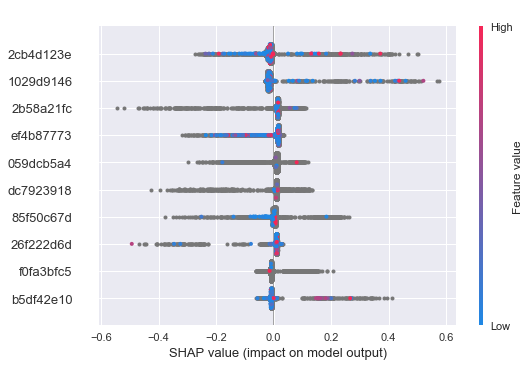

In [23]:
shap.summary_plot(shap_values, train_data, max_display=10, plot_type='dot')

In [24]:
N = 150
sorted_columns = np.argsort(np.sum(np.abs(shap_values), axis=0)[:-1])[::-1]
most_relevant = train_data.columns[sorted_columns[:N]]

In [25]:
union_cols = list(set(most_relevant)|set(cols_leak))
#diff_cols = list(set(most_relevant)-set(cols_leak))

In [26]:
feat_train = train_data[union_cols]
feat_test = test_data[union_cols]

In [27]:
feat_train = feat_train[feat_train.isna().sum().sort_values().index.values]
feat_test = feat_test[feat_train.isna().sum().sort_values().index.values]

#### Assembly

In [28]:
train_final = np.hstack((feat_train.values, stat_train.values))
test_final = np.hstack((feat_test.values, stat_test.values))

In [29]:
print('Final number of features: %i' % train_final.shape[1])

Final number of features: 225


### before anything, grid search

#### xgb

params before:
{'learning_rate':0.1, 'colsample_bytree': .04, 'eval_metric':'rmse', 'lambda': 3., 'alpha': 0.03}

params now:
{'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004, 'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cv_params = {'learning_rate': [0.003]}
ind_params = {'num_boost_round': 6000, 'colsample_bytree': 0.75, 'min_child_weight': 4, 'reg_alpha': 0.,
             'subsample': 0.15, 'reg_lambda': 0.0004}

In [ ]:
optimized_GBM = GridSearchCV(xgb.XGBRegressor(**ind_params), cv_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1,
                            verbose=1)

In [ ]:
optimized_GBM.fit(train_final, log_target)

In [ ]:
optimized_GBM.best_params_

#### lgb

params before:
{'learning_rate':0.001, 'lambda_l2': 0.05, 'feature_fraction': 0.075, 'lambda_l1': 0.01}

params now:
{'learning_rate':0.002, 'lambda_l2': 0.1, 'feature_fraction': 0.1, 'lambda_l1': 0.002}}

In [ ]:
cv_params = {'learning_rate': [0.002], 'lambda_l2': [0.1], 'feature_fraction': [0.08, 0.1,0.12],
             'lambda_l1': [0.002]}

In [ ]:
def crossvaltest(params,n_splits=5):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_final):
        X_tr, X_tst = train_final[train_index], train_final[test_index]
        y_tr, y_tst = log_target[train_index], log_target[test_index]

        train_set = lgb.Dataset(X_tr, label=y_tr)
        valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

        bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set], early_stopping_rounds=500, 
                        verbose_eval=1000)

        y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)

        rmsle = np.sqrt(mean_squared_error(y_tst, y_val))

        res.append(rmsle)
    return np.mean(res)

In [ ]:
from itertools import product

def param_tune(n_splits=5):
    score = ('nothing', 3.)
    for prms in product(cv_params['learning_rate'],
                      cv_params['lambda_l2'],
                      cv_params['feature_fraction'],
                      cv_params['lambda_l1']):
        params = {'metric': 'rmse', 'learning_rate': prms[0], 'lambda_l2': prms[1], 'feature_fraction': prms[2],
                  'lambda_l1': prms[3]}
        res = crossvaltest(params,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        print(res)
        if res<score[1]:
            score = (str(params), res)
    return score

In [ ]:
bestpar = param_tune()

In [ ]:
bestpar

#### cb

params before:
{'eta':0.01, 'l2_leaf_reg: 3, 'border_count': 32, 'depth': 5}

params now:
{'learning_rate':0.01, 'l2_leaf_reg': 8, 'border_count': 45, 'depth': 5}}

In [ ]:
cv_params = {'eta': [0.01], 'l2_leaf_reg':[8], 'border_count':[45], 'depth': [5]}

In [ ]:
def crossvaltest(params,n_splits=5):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_final):
        X_tr, X_tst = train_final[train_index], train_final[test_index]
        y_tr, y_tst = log_target[train_index], log_target[test_index]

        bst = cb.CatBoostRegressor(eta=params[0], l2_leaf_reg=params[1], border_count=params[2], iterations=7500,
                                   loss_function='RMSE', eval_metric='RMSE', depth=params[3])
    
        bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

        y_val = bst.predict(X_tst)

        rmsle = np.sqrt(mean_squared_error(y_tst, y_val))

        res.append(rmsle)
    return np.mean(res)

In [ ]:
from itertools import product

def param_tune(n_splits=5):
    score = ('nothing', 3.)
    for prms in product(cv_params['eta'],
                      cv_params['l2_leaf_reg'],
                      cv_params['border_count'],
                      cv_params['depth']):
        res = crossvaltest(prms,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        print(res)
        if res<score[1]:
            score = (str(prms), res)
    return score

In [ ]:
bestpar = param_tune()

In [ ]:
bestpar

### oof train+test

In [30]:
train_df = pd.DataFrame.from_dict({'ID': train_ID})
test_df = pd.DataFrame.from_dict({'ID': test_ID})

In [31]:
def lgbCV(ooftrain, ooftest, n_folds=5, multiplier=10):
    params = {'boosting': 'gbdt', 'objective':'regression', 'learning_rate':0.002, 'metric':'rmse', 'max_bin':63, 
              'lambda_l2': 0.1, 'device':'cpu', 'feature_fraction': 0.1, 'lambda_l1': 0.002}
    for i in range(multiplier):
        ooftrain['lgb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['lgb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = lgb.Dataset(X_tr, label=y_tr)
            valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

            bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['lgb_'+str(i)][test_index] = np.expm1(y_val)
    
            ooftest['lgb_'+str(i)] = ooftest['lgb_'+str(i)] + np.expm1(bst.predict(test_final, 
                                                                                   num_iteration=bst.best_iteration))/n_folds

        print(np.mean(res))
    return

In [32]:
def xgbCV(ooftrain, ooftest, n_folds=5, multiplier=10):
    params = {'booster': 'gbtree', 'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004,
              'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}
    test_set = xgb.DMatrix(test_final)
    for i in range(multiplier):
        ooftrain['xgb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['xgb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = xgb.DMatrix(X_tr, label=y_tr)
            valid_set = xgb.DMatrix(X_tst, label=y_tst)

            bst = xgb.train(params, train_set, num_boost_round=20000, evals=[(train_set, 'train'), (valid_set, 'val')],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(valid_set, ntree_limit=bst.best_ntree_limit)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['xgb_'+str(i)][test_index] = np.expm1(y_val)
    
            ooftest['xgb_'+str(i)] = ooftest['xgb_'+str(i)] + np.expm1(bst.predict(test_set,
                                                                                     ntree_limit=bst.best_ntree_limit))/n_folds

        print(np.mean(res))
    return

In [33]:
def cbCV(ooftrain, ooftest, n_folds=5, multiplier=10):
    for i in range(multiplier):
        ooftrain['cb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['cb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            bst = cb.CatBoostRegressor(eta=0.01, l2_leaf_reg=8, border_count=45, iterations=7500,
                                       loss_function='RMSE', eval_metric='RMSE', depth=5)
    
            bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

            y_val = bst.predict(X_tst)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['cb_'+str(i)][test_index] = np.expm1(y_val)
    
            ooftest['cb_'+str(i)] = ooftest['cb_'+str(i)] + np.expm1(bst.predict(test_final))/n_folds

        print(np.mean(res))
    return

In [34]:
lgbCV(train_df,test_df)

1.3312689020183046
1.3369216363768246
1.331645764293455
1.3261778246213567
1.3332382440392152
1.3306893003563571
1.332401401679239
1.3359750931452898
1.3263152301547088
1.3294557529602913


In [35]:
xgbCV(train_df,test_df)

1.3394850135083856
1.340642637732085
1.3484433730838632
1.339881136499843
1.3413718013839646
1.3424023025564051
1.3389333055183044
1.3438799197195288
1.345059880754065
1.3430150503496492


In [36]:
cbCV(train_df,test_df)

1.3468224530158586
1.34473844607654
1.3422515827503938
1.3474088149921943
1.3412714257931964
1.3455116393693003
1.3419546755774403
1.3465892331701392
1.3459014013514985
1.342424996031792


In [37]:
train_df.head()

,ID,lgb_0,lgb_1,lgb_2,lgb_3,lgb_4,lgb_5,lgb_6,lgb_7,lgb_8,...,cb_0,cb_1,cb_2,cb_3,cb_4,cb_5,cb_6,cb_7,cb_8,cb_9
0,000d6aaf2,2443.989237,2670.423649,2270.088300,2052.841811,2262.585018,2167.449745,2453.364063,2416.767426,2727.913587,...,2834.150261,2530.986057,2953.019000,3108.757535,2700.513517,3123.380601,3089.223890,2731.421142,3373.954603,2706.944588
1,000fbd867,3047.382614,3557.194804,3181.242457,3150.765183,2988.669645,3170.073748,3139.065015,3491.409845,2753.003494,...,4302.240825,3855.948239,3617.611522,3764.085373,3321.427088,3415.185342,3099.586495,3424.988735,3075.633986,3875.059032
2,0027d6b71,2387.734883,2625.061776,2824.739397,2778.946141,2375.506266,2476.315128,2740.639277,2438.131316,2355.831340,...,2515.603512,2251.642231,2381.913050,2308.421338,2824.808421,1853.078391,2372.428650,2070.507471,2121.925004,2387.223268
3,0028cbf45,794.538534,994.468188,666.711836,858.139913,800.910641,907.453220,772.531547,952.729701,942.949060,...,1082.525236,761.529652,864.603772,765.376492,907.266617,794.358866,860.346758,773.823805,897.765588,879.504465
4,002a68644,3152.055650,3416.403142,3809.980399,3352.825697,3278.282077,3492.012594,3548.185944,3542.271579,3758.285158,...,3207.749720,3094.607780,2771.458825,2799.970431,2924.291852,2357.856774,3146.500333,3109.498414,2710.730021,2895.752365


In [38]:
test_df.head()

,ID,lgb_0,lgb_1,lgb_2,lgb_3,lgb_4,lgb_5,lgb_6,lgb_7,lgb_8,...,cb_0,cb_1,cb_2,cb_3,cb_4,cb_5,cb_6,cb_7,cb_8,cb_9
0,000137c73,2108.617860,2091.993509,2066.323586,2160.928159,2020.037656,2074.071534,2141.055330,2115.442800,2160.793330,...,1637.391108,1627.924375,1874.137464,1649.856093,1718.613457,1969.594948,2070.855959,1801.576023,1526.853953,1614.523689
1,00021489f,1814.485345,1730.380730,1732.363449,1790.250907,1787.021790,1765.716296,1773.606759,1839.740891,1793.623062,...,2113.334166,1819.295271,2100.863081,2033.594231,2120.148786,2421.836198,2317.494119,2045.175613,1865.539526,1933.943437
2,0004d7953,1941.195573,1913.528053,1918.502247,1956.773888,1960.055608,1921.126404,1913.108317,1975.615429,2003.972866,...,1851.230360,1840.857181,1855.167950,1858.601337,1798.619734,1824.315034,1824.292975,1830.578330,1856.714126,1807.811087
3,00056a333,5048.213215,5000.362706,4987.926487,5373.030379,5048.809908,4983.530832,5309.750673,5066.867213,5444.354377,...,4551.050865,4561.362549,4686.418553,4672.005803,4878.592192,4709.060932,4200.912472,4453.589721,4944.653022,4220.119499
4,00056d8eb,2175.440725,2202.488435,2208.552650,2240.526784,2294.934206,2267.575114,2237.749713,2248.780575,2179.826917,...,2281.611252,2420.691793,2403.004807,2294.576606,2296.568352,2399.544147,2512.313171,2420.336370,2346.538844,2311.801377


In [2]:
#train_df.to_csv('../submission_files/leak/oof/train_df_190f_10x5fold.csv', index=False)
#test_df.to_csv('../submission_files/leak/oof/test_df_190f_10x5fold.csv', index=False)
train_df = pd.read_csv('../submission_files/leak/oof/train_df_sumf_pc_10x5fold.csv')
test_df = pd.read_csv('../submission_files/leak/oof/test_df_sumf_pc_10x5fold.csv')

In [3]:
train_df = train_df.drop(['ID'], axis=1)
test_df = test_df.drop(['ID'], axis=1)

In [4]:
#train_df = train_df[train_df.columns[:10]]
#test_df = test_df[test_df.columns[:10]]

In [5]:
#train_df2 = np.hstack((train_df.values, stat_train.values))#, stat_train2.values))
#test_df2 = np.hstack((test_df.values, stat_test.values))#, stat_test2.values))
train_df2 = train_df.values
test_df2 = test_df.values

In [6]:
train_df2.shape

(4459, 30)

### Final CV

#### cb

In [7]:
def finalCV(n_folds=5, multiplier=10):
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            bst = cb.CatBoostRegressor(eta=0.01, iterations=2500,
                                       loss_function='RMSE', eval_metric='RMSE', depth=4)
    
            bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

            y_val = bst.predict(X_tst)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + np.expm1(bst.predict(test_df2))/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [8]:
def lgbfinalCV(n_folds=5, multiplier=10):
    params = {'boosting': 'gbdt', 'objective':'regression', 'learning_rate':0.01, 'metric':'rmse', 'max_bin':63, 
              'lambda_l2': 0.1, 'device':'cpu', 'feature_fraction': 0.1, 'lambda_l1': 0.002}
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = lgb.Dataset(X_tr, label=y_tr)
            valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

            bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + np.expm1(bst.predict(test_df2, num_iteration=bst.best_iteration))/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [9]:
def xgbfinalCV(n_folds=5, multiplier=10):
    params = {'booster': 'gbtree', 'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004,
              'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}
    test_set = xgb.DMatrix(test_df2)
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = xgb.DMatrix(X_tr, label=y_tr)
            valid_set = xgb.DMatrix(X_tst, label=y_tst)

            bst = xgb.train(params, train_set, num_boost_round=20000, evals=[(train_set, 'train'), (valid_set, 'val')],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(valid_set, ntree_limit=bst.best_ntree_limit)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + np.expm1(bst.predict(test_set, ntree_limit=bst.best_ntree_limit))/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [47]:
submission_cb = finalCV()

1.3290071134883052
1.329739455961762
1.3253622483985423
1.3300545508109565
1.3271772615197457
1.3295697674415174
1.3279008855605337
1.3288004200361865
1.3282013412592315
1.3289768722801707


In [48]:
submission_lgb = lgbfinalCV()

1.3333575121797545
1.333025871824744
1.3330645685351614
1.3324237973706152
1.3363825752109326
1.3359883927075291
1.3350056697611727
1.333140323213886
1.3365256771210485
1.3371340900534912


In [15]:
submission_xgb = xgbfinalCV()

1.347339646145811
1.3449710724663162
1.3395912554832112
1.3443460433388947
1.3488258424557187
1.3472256596928998
1.3448654966901659
1.3437956987031487
1.3491910710289317
1.3477975453283437


#### ceiling to overestimate

In [16]:
for submission in [submission_xgb]:
    submission.target = 1000*np.ceil(submission.target)
#submission.target = 1000*submission.target

In [17]:
submission_cb.head(11)

NameError: name 'submission_cb' is not defined

In [52]:
submission_lgb.head(11)

,ID,target
0,000137c73,2197000.0
1,00021489f,1838000.0
2,0004d7953,2390000.0
3,00056a333,4549000.0
4,00056d8eb,2282000.0
5,0005fc190,2718000.0
6,000787e86,2616000.0
7,0008510a0,2732000.0
8,000895faf,3260000.0
9,000986fba,2286000.0


In [18]:
submission_xgb.head(11)

,ID,target
0,000137c73,1672000.0
1,00021489f,1282000.0
2,0004d7953,2186000.0
3,00056a333,4352000.0
4,00056d8eb,2104000.0
5,0005fc190,3022000.0
6,000787e86,1899000.0
7,0008510a0,2985000.0
8,000895faf,2626000.0
9,000986fba,2752000.0


In [19]:
#submission_cb.to_csv('../submission_files/leak/45. stackcb_190f.csv', index=False)
#submission_lgb.to_csv('../submission_files/leak/46. stacklgb_190f.csv', index=False)
submission_xgb.to_csv('../submission_files/leak/49. stackxgb_190f.csv', index=False)

In [16]:
submission = pd.read_csv("../submission_files/leak/53. 05x51+05xpublic04.csv")

In [17]:
leak2 = pd.read_csv('../submission_files/leak/public/extraf6.csv')

leak2_idx = leak2[leak2.target != 0.].index.values
leak2_vals = leak2[leak2.target != 0.].target.values

leak2_vals = np.round(np.expm1(leak2_vals))

In [18]:
sub = submission.copy()

In [20]:
sub.target[leak2_idx] = 0.5*sub.target[leak2_idx] + 0.5*leak2_vals

In [21]:
sub.head(11)

,ID,target
0,000137c73,1.680908e+06
1,00021489f,1.558343e+06
2,0004d7953,1.976375e+06
3,00056a333,4.193232e+06
4,00056d8eb,2.105072e+06
5,0005fc190,2.511025e+06
6,000787e86,1.700873e+06
7,0008510a0,2.790256e+06
8,000895faf,2.673861e+06
9,000986fba,2.738353e+06


In [15]:
sub.to_csv("../submission_files/leak/55. 053+extraf6.csv", index=False)

In [4]:
sub2 = pd.read_csv('../submission_files/leak/public/04. honest_v5_137.csv')

In [37]:
sub2 = pd.read_csv('../submission_files/leak/26. stacklgb_sumf_pc_138.csv')

In [5]:
sub3 = sub.copy()

In [6]:
sub3.target = 0.5*sub.target + 0.5*sub2.target

In [7]:
sub3.to_csv("../submission_files/leak/53. 05x51+05xpublic04.csv", index=False)

In [8]:
ss = pd.read_csv('../submission_files/leak/28. 24+public03_059_best.csv')

In [9]:
sub['h'] = sub.target - ss.target

In [10]:
sub.h[sub.h!=0].index.values.shape

(37,)